## Monkey_936 （dataID:251637) fMOST data_analysis 

In [2]:
import neuro_tracer as nt

import sys,copy,os,inspect

neurovis_path = os.path.abspath(r'D:\projectome_analysis\neuron-vis\neuronVis')
sys.path.append(neurovis_path)

import IONData 
iondata = IONData.IONData()



from pathlib import Path
import matplotlib


import matplotlib.pyplot as plt


import numpy as np
import nibabel as nib  # parse the NII data
import pandas as pd

import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import matplotlib.cm as cm

from scipy.cluster.hierarchy import dendrogram, linkage

neuronlist=iondata.getNeuronListBySampleID('251637')
import nrrd
import region_analysis as ra



### Acquire neuronlist for m936

In [3]:

neuronlist=iondata.getNeuronListBySampleID('251637')

neurontable = pd.DataFrame(neuronlist)


neurontable['region'].value_counts(dropna=False)
neurontable['region'] = neurontable['region'].str.replace('\r', '',regex=False)
# Replace empty strings with 'unknown'
neurontable['region'] = neurontable['region'].replace('', 'unknown', regex=False)


# Get the distribution
region_distribution = neurontable['region'].value_counts(dropna=False)
print(f'there are {len(neurontable)} neurons for m936 \n')

there are 562 neurons for m936 



### Load Atlas for region infomation: 

*Atlas chosen*: NMT_v2.0_sym SS （'D:\projectome_analysis\atlas\nmt_structure.nrrd'）  
*Key_table*: CHARM_key_all_txt ('D:\projectome_analysis\atlas\NMT\tables_CHARM\CHARM_key_all.txt')

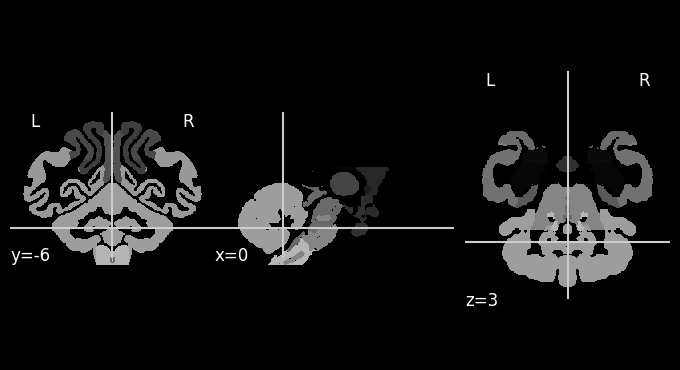

In [47]:
%matplotlib inline    
from nilearn import plotting
# atlas,atlas_header=nrrd.read(r'D:\projectome_analysis\atlas\nmt_structure.nrrd')
# reso=np.diag(atlas_header['space directions'])

charm_atlas=nib.load(r'D:\projectome_analysis\atlas\NMT_v2.0_sym\NMT_v2.0_sym\CHARM_in_NMT_v2.0_sym.nii.gz')
sarm_atlas=nib.load(r'D:\projectome_analysis\atlas\NMT_v2.0_sym\NMT_v2.0_sym\SARM_in_NMT_v2.0_sym.nii.gz')
charm_atlas_data=charm_atlas.get_fdata();sarm_atlas_data=sarm_atlas.get_fdata()
sarm_atlas_data=sarm_atlas_data+300
combined_atlas_data=charm_atlas_data+sarm_atlas_data
combined_atlas_nii=nib.Nifti1Image(combined_atlas_data,charm_atlas.affine)
nib.save(combined_atlas_nii,r'D:\projectome_analysis\atlas\nmt_structure_with_hiearchy.nii.gz')
combined_atlas_nii=nib.load(r'D:\projectome_analysis\atlas\nmt_structure_with_hiearchy.nii.gz')
atlas=combined_atlas_nii.get_fdata()
plotting.plot_anat(combined_atlas_nii.slicer[:,:,:,0,1])


In [46]:

charm_id_df = pd.read_csv(r'D:\projectome_analysis\atlas\NMT\tables_CHARM\CHARM_key_all.txt',delimiter='\t')
sarm_id_df = pd.read_csv(r'D:\projectome_analysis\atlas\NMT\tables_SARM\SARM_key_all.txt',delimiter='\t')
sarm_id_df['Index']=sarm_id_df['Index']+300
# Concatenate the DataFrames vertically without resetting the index
global_id_df = pd.concat([charm_id_df, sarm_id_df], axis=0)
global_id_df.to_csv(r'D:\projectome_analysis\atlas\nmt_structures_labels.txt', sep='\t')
# Print the combined DataFrame
global_id_df = pd.read_csv(r'D:\projectome_analysis\atlas\nmt_structures_labels.txt',sep='\t')
print(global_id_df)
print(f'Atlas dimension {atlas.shape}, Voxel reso: {reso} mm \n \n ')


     Unnamed: 0  Index Abbreviation                    Full_Name  First_Level  \
0             0      1      Frontal                 Frontal_Lobe            1   
1             1      2         ACgG     anterior_cingulate_gyrus            2   
2             2      3          ACC    anterior_cingulate_cortex            3   
3             3      4      area_32                      area_32            4   
4             4      5      area_25             subgenual_cortex            4   
..          ...    ...          ...                          ...          ...   
559         313    614          LRt    lateral_reticular_nucleus            5   
560         314    615          vmt      ventral_medullar_tracts            4   
561         315    616           py              pyramidal_tract            5   
562         316    617          pyx  pyramidal_tract_decussation            5   
563         317    618          cst          corticospinal_tract            5   

     Last_Level  
0        

In [14]:
global_id_df[global_id_df['Abbreviation'] == 'Thal']


,Index,Abbreviation,Full_Name,First_Level,Last_Level
104,405,Thal,thalamus,2,2


In [23]:


pop = ra.PopulationRegionAnalysis('251637', atlas, global_id_df)
pop.process(level=1) #corresponding to level 2 


Loading SWC from local file: d:\projectome_analysis\main_scripts\processed_neurons\251637\001.swc
there are 204 terminal nodes

Constructing branches, assigning orders 
 


Finished with 401 branches
Loading SWC from local file: d:\projectome_analysis\main_scripts\processed_neurons\251637\002.swc
there are 24 terminal nodes

Constructing branches, assigning orders 
 


Finished with 42 branches
Loading SWC from local file: d:\projectome_analysis\main_scripts\processed_neurons\251637\003.swc
there are 46 terminal nodes

Constructing branches, assigning orders 
 


Finished with 83 branches
Loading SWC from local file: d:\projectome_analysis\main_scripts\processed_neurons\251637\004.swc
there are 222 terminal nodes

Constructing branches, assigning orders 
 


Finished with 438 branches
Loading SWC from local file: d:\projectome_analysis\main_scripts\processed_neurons\251637\005.swc
there are 84 terminal nodes

Constructing branches, assigning orders 
 


Finished with 164 branches
Loadi

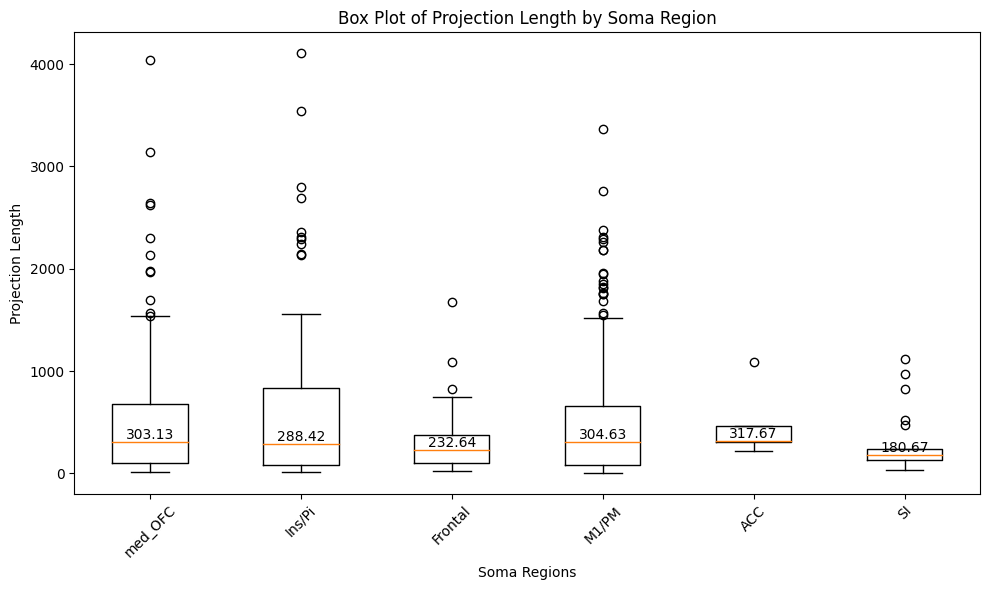

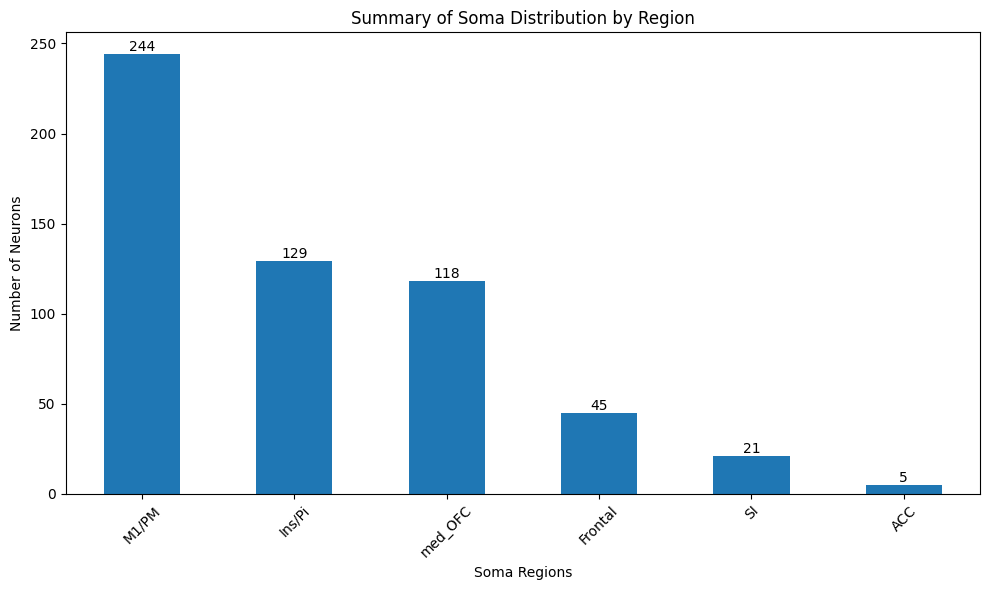

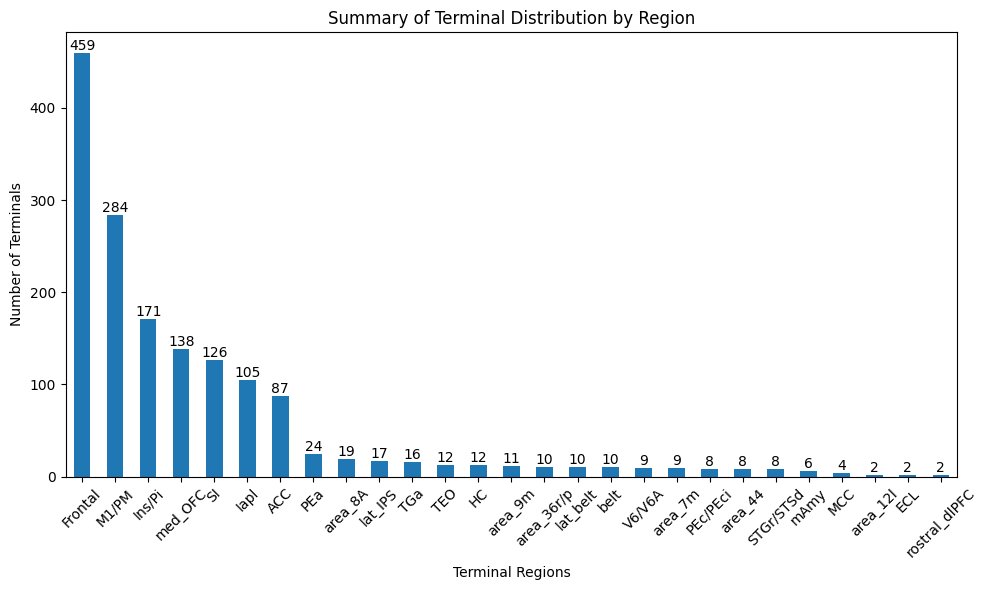

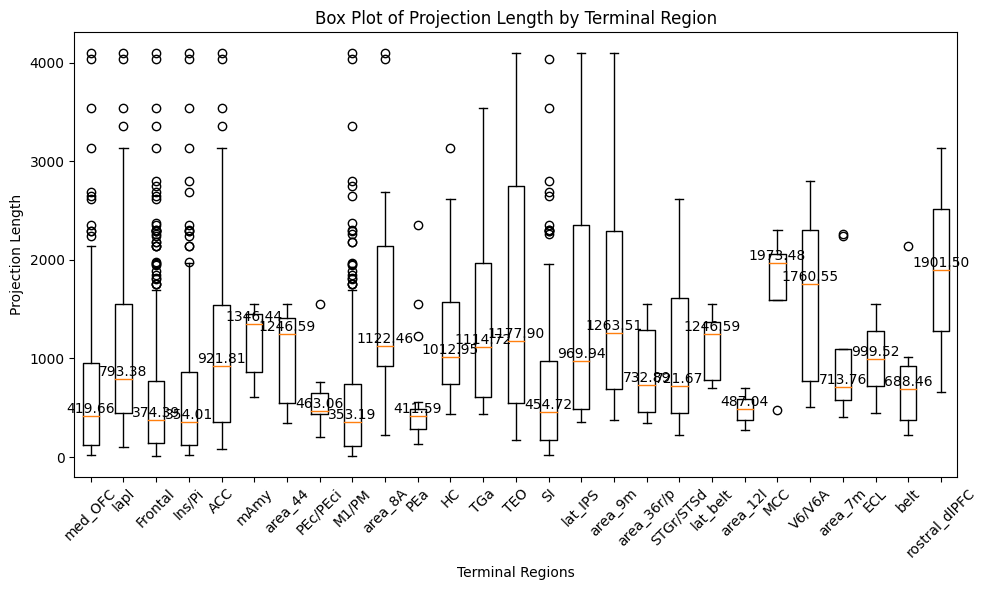

In [26]:
%matplotlib inline    

pop.plot_projection_by_soma(stat='median')  # or 'mean'
pop.plot_soma_distribution()
pop.plot_terminal_distribution()
pop.plot_projection_by_terminal(stat='median')

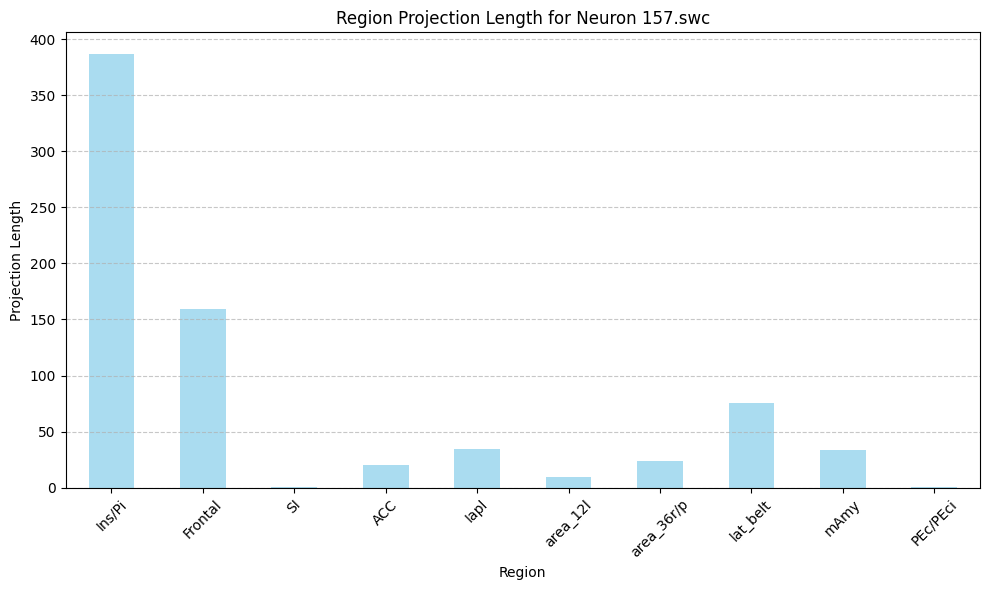

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the data for the specific NeuronID
neuron_data = pop.plot_dataframe.loc[pop.plot_dataframe['NeuronID'] == '157.swc', ['Region_projection_length']]

# Ensure there is only one row for '157.swc'
if len(neuron_data) == 1:
    # Convert the dictionary to a Pandas Series
    region_lengths_series = pd.Series(neuron_data['Region_projection_length'].iloc[0])
    
    # Plot the Series using matplotlib
    plt.figure(figsize=(10, 6))
    region_lengths_series.plot(kind='bar', color='skyblue', alpha=0.7)
    plt.xlabel('Region')
    plt.ylabel('Projection Length')
    plt.title('Region Projection Length for Neuron 157.swc')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("No unique entry found for NeuronID '157.swc' or multiple entries found.")


### Extract brain area names related to insula to filter out insular neurons`

In [21]:

insula_abbr_table =global_id_df['Abbreviation'][global_id_df['Full_Name'].str.contains('insula',case=False)]

print('there are %d insula regions in the monkey 936 atlas'%len(insula_abbr_table),'\n',insula_abbr_table)

there are 11 insula regions in the monkey 936 atlas 
 38     Iam/Iapm
39       lat_Ia
40          Iai
41          Ial
42         Iapl
224      Ins/Pi
225          Pi
226         Ins
227       Ia/Id
228          Ig
229          Ri
Name: Abbreviation, dtype: object


### Soma distribution of Insula neurons for m936


--- Filtering for neurons with soma in regions: ['Iam/Iapm', 'lat_Ia', 'Iai', 'Ial', 'Iapl', 'Ins/Pi', 'Pi', 'Ins', 'Ia/Id', 'Ig', 'Ri'] ---

Neurons matching the target soma regions:


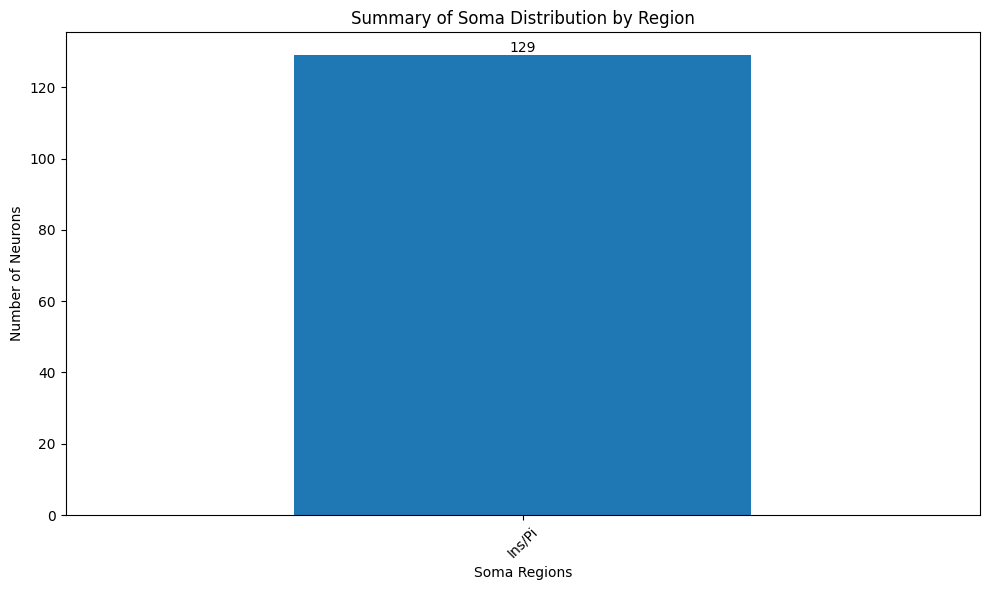

In [24]:

neuron_analysis_df = pop.plot_dataframe


target_soma_regions = insula_abbr_table.tolist()

print(f"\n--- Filtering for neurons with soma in regions: {target_soma_regions} ---")

filtered_neurons_df = neuron_analysis_df[neuron_analysis_df['Soma_Region'].isin(target_soma_regions)]

if not filtered_neurons_df.empty:
    print("\nNeurons matching the target soma regions:")
    # Display relevant columns for the filtered neurons
    # print(filtered_neurons_df[['NeuronID', 'Soma_Region', 'Projection_length']])
else:
    print("No neurons found with soma regions in the specified list.")

ra.plot_soma_distribution(filtered_neurons_df)


### to enable QC, I split the neurons according to insula subregions.
 SWC files of those neurons are converted to fnt format.
 we could utilise shortcut to directly access individual neuron's fnt with one click function.
 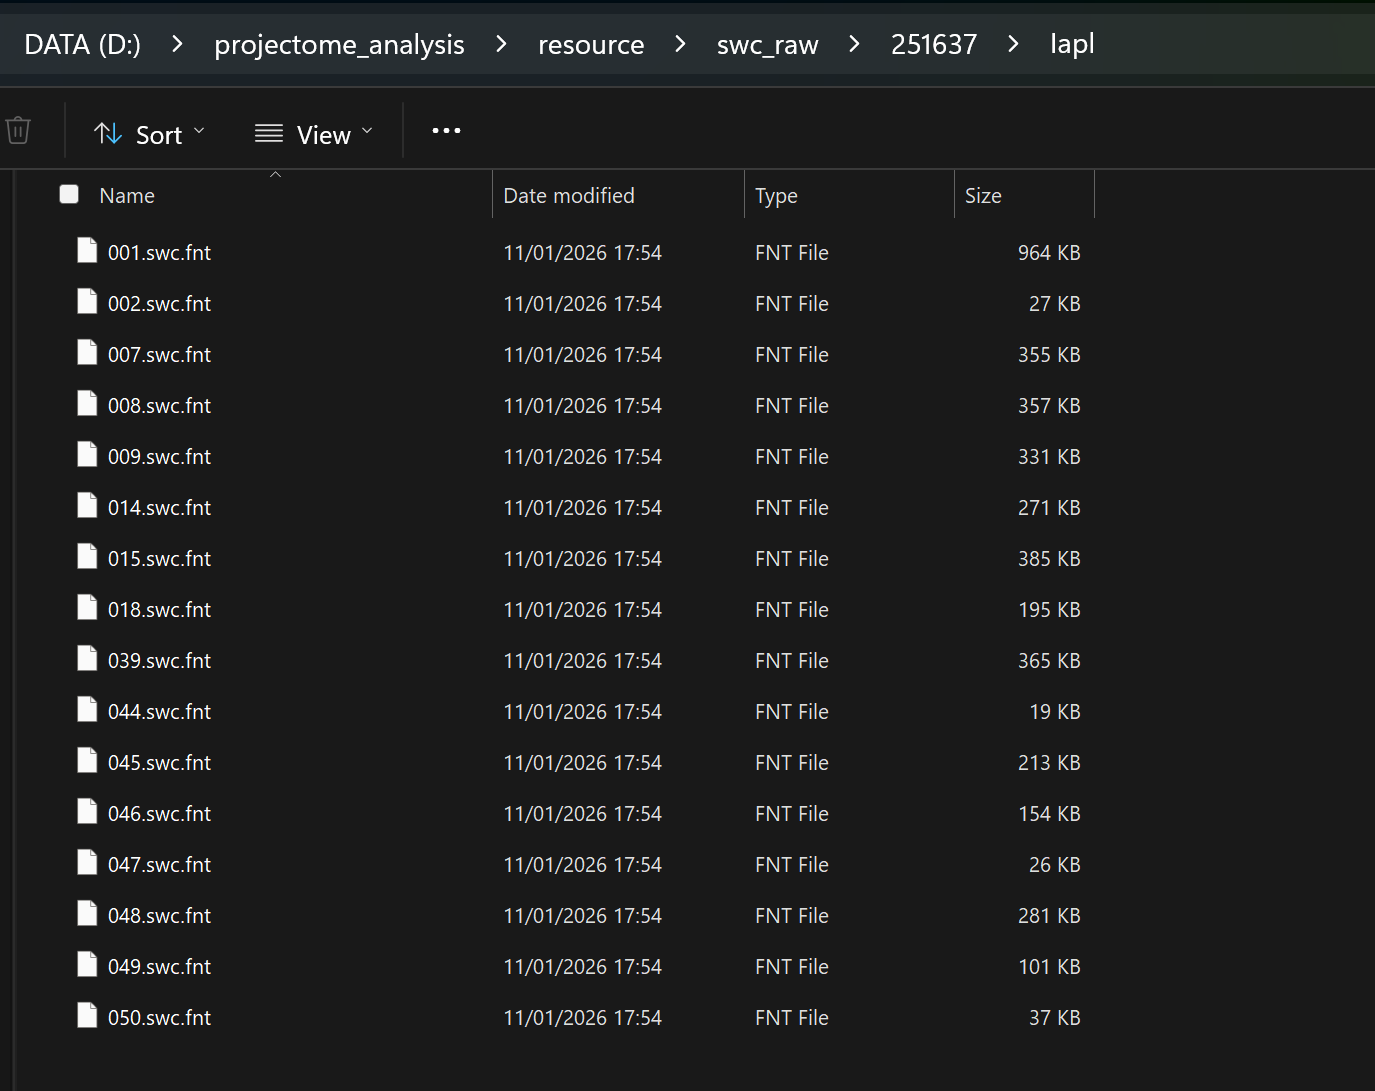

Combinning FNT and neuron plot we could check the neuron identity

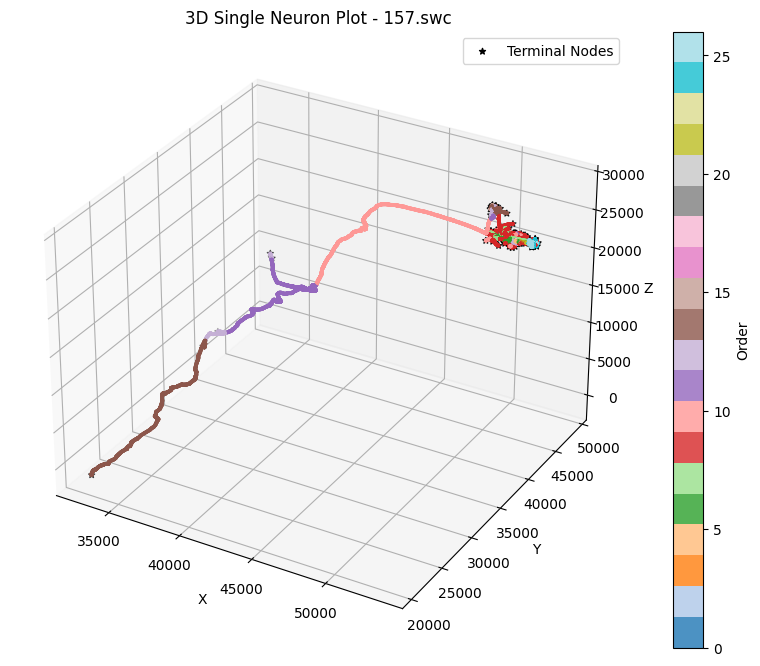

In [44]:
pop.neurons [157].plot_neuron()

In [ ]:

import fnt_tools

fnt_tools.region_swc2fnt(filtered_neurons_df,"Iapl")


NameError: name 'filtered_neurons_df' is not defined

c:\Users\binbi\anaconda3\envs\neuronVis\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


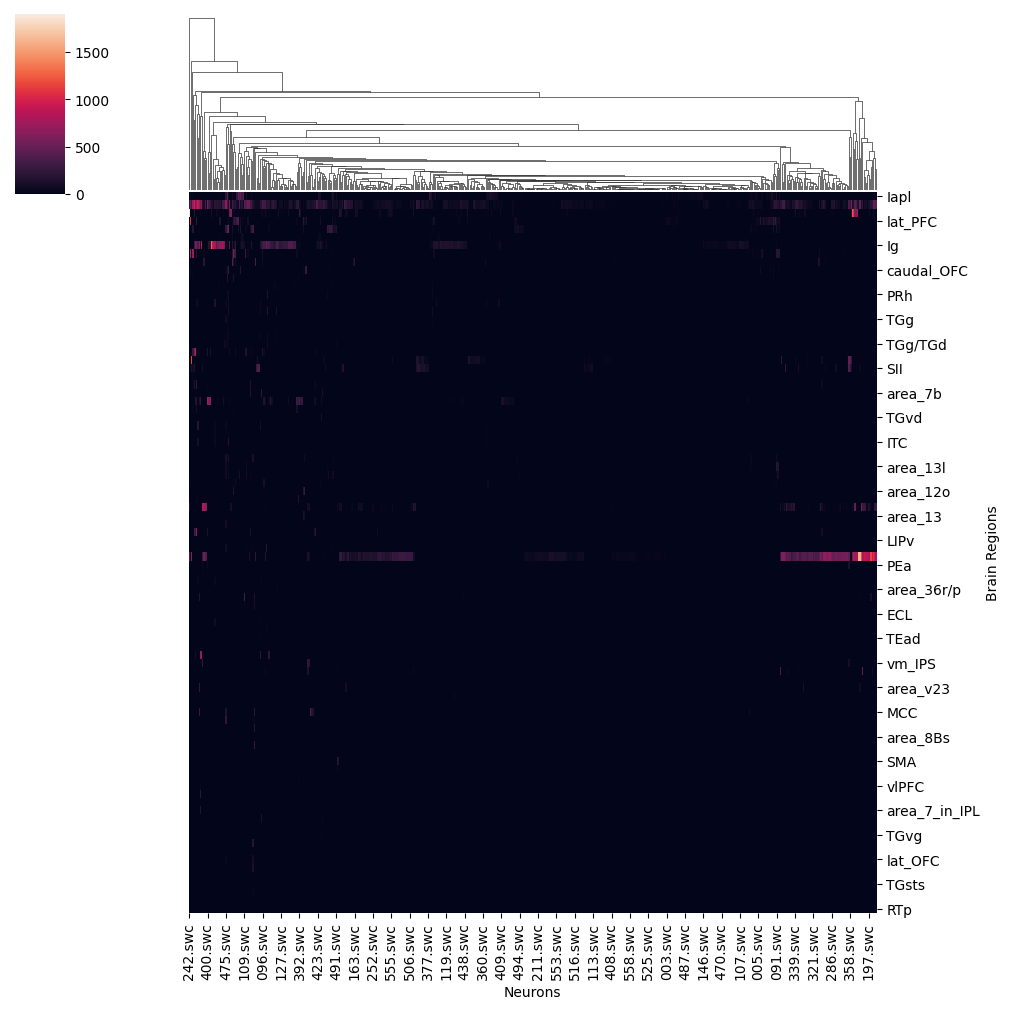

In [31]:
%matplotlib inline
figure2 = pd.DataFrame(pop.region_projection_lengths,index=pop.neuron_ids)
figure2.fillna(0,inplace=True)


row_linkage = linkage(figure2.T, method='ward', metric='euclidean')  # Cluster neurons

g = sns.clustermap(figure2.T,
                   row_linkage=row_linkage,
                   row_cluster=False)

g.ax_heatmap.set_ylabel('Brain Regions')
g.ax_heatmap.set_xlabel('Neurons')


# Show the plot
plt.show()